In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib qt5

In [2]:
states = [(0, 0),
          (1, 0),
          (2, 0),
          (3, 0),
          (4, 0),
          (0, 1),
          (1, 1),
          (2, 1),
          (3, 1),
          (4, 1),
          (0, 2),
          (1, 2),
          (2, 2),
          (3, 2),
          (4, 2),
          (0, 3),
          (1, 3),
          (2, 3),
          (3, 3),
          (0, 4),
          (1, 4),
          (2, 4)]

In [3]:
Q = [[-5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1/2, -6, 5, 0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, -7, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1, -7, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, -2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1/5, 0, 0, 0, 0, -26/5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 1/5, 0, 0, 0, 1/2, -31/5, 5, 0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1/5, 0, 0, 0, 1, -36/5, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1/5, 0, 0, 0, 1, -36/5, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1/5, 0, 0, 0, 1, -11/5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 2/5, 0, 0, 0, 0, -27/5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1/2, -32/5, 5, 0, 0, 1/2, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1, -37/5, 5, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1, -37/5, 5, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1, -12/5, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 0, -27/5, 5, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1/2, -32/5, 5, 0, 1/2, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1/2, -32/5, 5, 0, 1/2, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1/2, -7/5, 0, 0, 1/2],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, -27/5, 5, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, -27/5, 5],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, -2/5]]

In [4]:
G = nx.MultiDiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[i][j]
        if rate > 0:
            G.add_edge(origin_state, destination_state, weight=rate, label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)

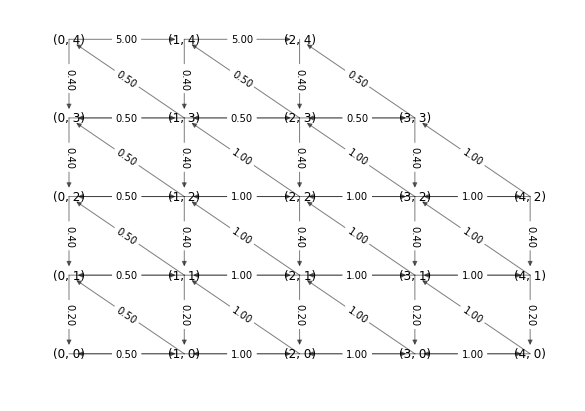

In [6]:
plt.figure(figsize=(10,7))
node_size = 200
pos = {state:list(state) for state in states}
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G, pos, font_weight=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.axis('off');
plt.savefig("mc-matplotlib.svg", bbox_inches='tight')

In [7]:
nx.write_dot(G, 'mc.dot')
!neato -Tps -Goverlap=scale mc.dot -o mc.ps; convert mc.ps mc.png

AttributeError: module 'networkx' has no attribute 'write_dot'